# Gap Junctions

A simple network with gap junctions.

This is a reimplementation of the Brian example:

http://brian2.readthedocs.org/en/2.0b3/examples/synapses.gapjunctions.html

ANNarchy 4.6 (4.6.9b) on linux (posix). 


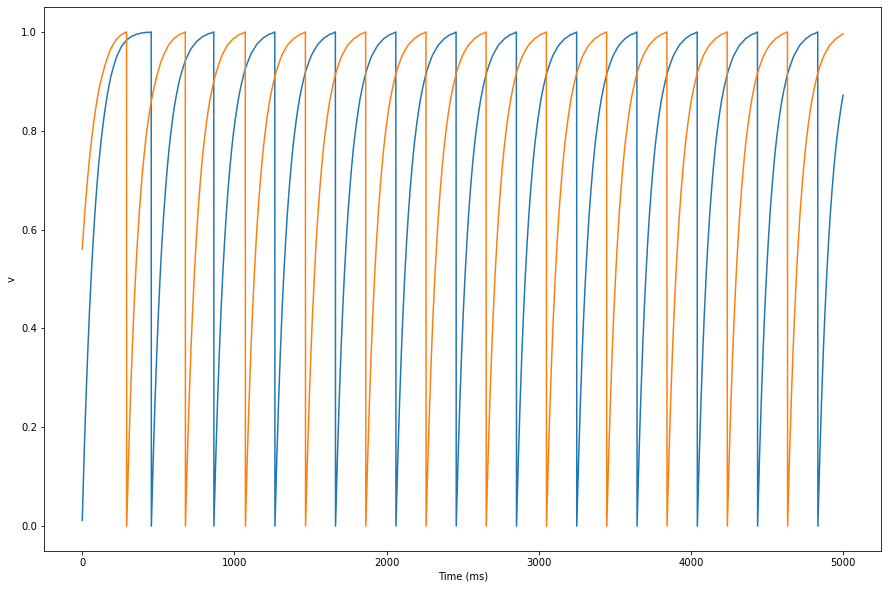

In [1]:
from ANNarchy import *
clear()

setup(dt=0.1)

neuron = Neuron(
    parameters = "v0 = 1.05: population; tau = 10.0: population",
    equations = "tau*dv/dt = v0 - v + g_gap",
    spike = "v >  1.",
    reset = "v = 0."
)

gap_junction = Synapse(
    psp = "w * (pre.v - post.v)"
)

pop = Population(10, neuron)
pop.v = np.linspace(0., 1., 10)

proj = Projection(pop, pop, 'gap', gap_junction)
proj.connect_all_to_all(0.02)

trace = Monitor(pop[0] + pop[5], 'v')

compile()

simulate(500.)

data = trace.get('v')

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plt.plot(data[:, 0])
plt.plot(data[:, 1])
plt.xlabel('Time (ms)')
plt.ylabel('v')
plt.show()